# Case Study: Ohio Clinic — Meeting Supply and Demand

## Scenario
Dr. Judy, a pediatric surgeon and supervisor at **Ohio Clinic**, is reviewing operations after the clinic reported **three years of financial losses**. Despite:
- Having **excellent doctors**
- Consistent **patient bookings**
- Positive **reputation**
- And no evidence of **financial mismanagement**

…the clinic is still running in deficit.

---

## Problem Statement

> *“Why are we losing money if all indicators show we are functioning properly?”*

Dr. Judy suspects a hidden factor: patients might be **missing their appointments**, leading to:
- Wasted doctor time
- Misallocated clinic resources
- Loss of operational efficiency

---

## Goals of the Case Study

1. **Validate the No-Show Hypothesis**
   - Use data to check if **patients are not showing up** for scheduled appointments.

2. **Build a Classification Model**
   - Predict whether a patient will **show up** or **miss** an appointment.
   - This enables:
     - Sending **reminders** to likely no-shows
     - **Optimizing schedules** for staff
     - **Reducing resource waste**

---

## Dataset Information

Source: [Kaggle - Medical Appointment No Shows](https://www.kaggle.com/joniarroba/noshowappointments)

### Key Features:

| Feature                | Description                                |
|------------------------|--------------------------------------------|
| `Age`                 | Age of the patient                         |
| `Gender`              | Male/Female                                |
| `AppointmentRegistration` | Date/time when appointment was booked     |
| `AppointmentData`     | Scheduled date of visit                    |
| `DayOfTheWeek`        | Day of the week for the appointment        |
| `Status`              | **Target**: Showed up or not               |
| `Diabetes`, `Alcoholism`, `Hypertension`, `Handicap`, `Smokes`, `Tuberculosis` | Patient medical history |
| `Scholarship`         | Whether patient is under social welfare    |
| `SMS_Reminder`        | If a reminder was sent                     |
| `AwaitingTime`        | Days between booking and appointment       |

---

## Machine Learning Objective

Use **classification algorithms** (e.g., Decision Tree, Random Forest, Gradient Boosting) to:
- **Train on patient features**
- **Predict the `Status` (Show / No-show)**

This model will help Dr. Judy plan operations more efficiently and reduce no-show related losses.

---


### Listing 5-1. Importing Packages Required for This Chapter

In [2]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

from sklearn.tree import plot_tree


from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier


### Listing 5-2. Reading the Data in the Memory and Printing the First Few Observations

In [77]:
df = pd.read_csv("datasets/KaggleV2-May-2016.csv")

print(f"Dataset contains {df.shape[0]} rows and {df.shape[1]} columns")
df.sample(10)

Dataset contains 110527 rows and 14 columns


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
100434,7.195419e+13,5687161,F,2016-05-11T14:58:55Z,2016-06-08T00:00:00Z,37,JESUS DE NAZARETH,0,0,0,0,0,1,No
103991,6.851942e+12,5657457,F,2016-05-04T09:23:36Z,2016-06-08T00:00:00Z,42,REDENÇÃO,0,1,0,0,0,1,No
10224,4.644279e+12,5659270,M,2016-05-04T13:31:36Z,2016-05-25T00:00:00Z,6,CRUZAMENTO,0,0,0,0,0,1,No
102460,5.216520e+13,5774695,F,2016-06-06T08:35:03Z,2016-06-06T00:00:00Z,28,ROMÃO,1,0,0,0,0,0,No
65840,3.769123e+13,5498742,M,2016-03-22T07:55:03Z,2016-05-17T00:00:00Z,7,JARDIM CAMBURI,0,0,0,0,0,0,No
82607,6.315139e+14,5742020,M,2016-05-30T07:39:59Z,2016-05-30T00:00:00Z,25,ITARARÉ,0,0,0,0,0,0,Yes
28785,8.252917e+13,5576086,F,2016-04-13T07:59:00Z,2016-05-02T00:00:00Z,33,ROMÃO,0,0,0,0,0,1,Yes
97546,8.844693e+11,5699232,F,2016-05-16T08:18:27Z,2016-06-08T00:00:00Z,10,SANTO ANTÔNIO,0,0,0,0,0,1,No
66678,4.457146e+12,5751299,F,2016-05-31T09:55:49Z,2016-05-31T00:00:00Z,36,SANTA TEREZA,0,0,0,0,0,0,No
39635,2.841843e+14,5635960,F,2016-04-28T14:21:03Z,2016-05-10T00:00:00Z,53,INHANGUETÁ,0,1,0,0,0,1,No


In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [79]:

for col in df.columns:
    print(f"{col}: {df[col].nunique()} unique values")

PatientId: 62299 unique values
AppointmentID: 110527 unique values
Gender: 2 unique values
ScheduledDay: 103549 unique values
AppointmentDay: 27 unique values
Age: 104 unique values
Neighbourhood: 81 unique values
Scholarship: 2 unique values
Hipertension: 2 unique values
Diabetes: 2 unique values
Alcoholism: 2 unique values
Handcap: 5 unique values
SMS_received: 2 unique values
No-show: 2 unique values


No-show
No     88208
Yes    22319
Name: count, dtype: int64


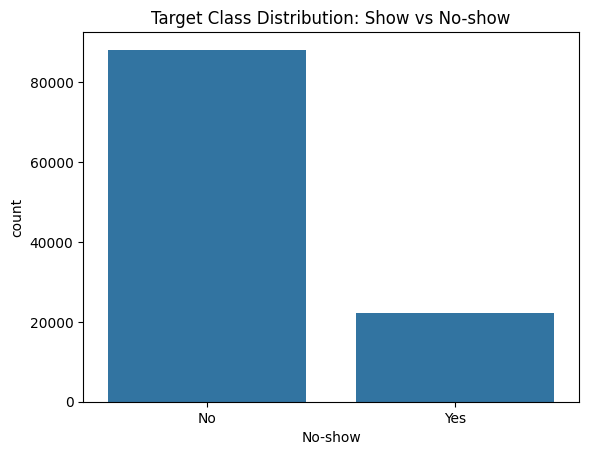

In [80]:
print(df['No-show'].value_counts())
sns.countplot(x='No-show', data=df)
plt.title("Target Class Distribution: Show vs No-show")
plt.show()

In [81]:
df.rename(columns={
    'Hipertension': 'Hypertension',
    'Handcap': 'Handicap',
    'No-show': 'NoShow',
    'ScheduledDay': 'ScheduledDate',
    'AppointmentDay': 'AppointmentDate',
    'SMS_received': 'SMS_Received'
}, inplace=True)


In [82]:
noshow_counts = df['NoShow'].value_counts(normalize=True) * 100

# Print formatted results
print(f" Percent of Patients who Showed Up     => {noshow_counts.get('No', 0):.2f}%")
print(f" Percent of Patients who Did Not Show => {noshow_counts.get('Yes', 0):.2f}%")

 Percent of Patients who Showed Up     => 79.81%
 Percent of Patients who Did Not Show => 20.19%


In [83]:
# Convert dates to datetime
df['ScheduledDate'] = pd.to_datetime(df['ScheduledDate'])
df['AppointmentDate'] = pd.to_datetime(df['AppointmentDate'])

# Confirm changes
df.head()

,PatientId,AppointmentID,Gender,ScheduledDate,AppointmentDate,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_Received,NoShow
0,2.987250e+13,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [84]:
df['AppointmentWeekDay'] = df['AppointmentDate'].dt.day_name()
df['ScheduledWeekDay'] = df['ScheduledDate'].dt.day_name()
df['WaitingDays'] = (df['AppointmentDate'] - df['ScheduledDate']).dt.days

df.sample(10)



,PatientId,AppointmentID,Gender,ScheduledDate,AppointmentDate,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_Received,NoShow,AppointmentWeekDay,ScheduledWeekDay,WaitingDays
39808,6.933760e+14,5705242,F,2016-05-17 07:00:10+00:00,2016-05-18 00:00:00+00:00,23,JESUS DE NAZARETH,0,0,0,0,0,0,No,Wednesday,Tuesday,0
103174,8.417168e+13,5789583,F,2016-06-08 15:19:20+00:00,2016-06-08 00:00:00+00:00,38,BOA VISTA,0,1,1,0,0,0,No,Wednesday,Wednesday,-1
103841,9.481879e+14,5706840,F,2016-05-17 08:53:40+00:00,2016-06-01 00:00:00+00:00,12,SANTO ANDRÉ,0,0,0,0,0,1,No,Wednesday,Tuesday,14
21530,4.694222e+13,5682543,F,2016-05-10 17:17:26+00:00,2016-05-16 00:00:00+00:00,50,MARIA ORTIZ,0,0,0,0,0,0,No,Monday,Tuesday,5
86468,8.927129e+13,5781893,F,2016-06-07 10:11:54+00:00,2016-06-07 00:00:00+00:00,24,BENTO FERREIRA,0,0,0,0,0,0,No,Tuesday,Tuesday,-1
63983,3.164119e+13,5652534,F,2016-05-03 10:16:03+00:00,2016-05-13 00:00:00+00:00,72,CONSOLAÇÃO,0,1,1,0,0,0,Yes,Friday,Tuesday,9
65735,1.111960e+12,5441814,M,2016-03-08 09:02:55+00:00,2016-05-02 00:00:00+00:00,2,JARDIM CAMBURI,0,0,0,0,0,1,No,Monday,Tuesday,54
30684,9.331989e+12,5690140,F,2016-05-12 09:34:06+00:00,2016-05-19 00:00:00+00:00,38,CENTRO,0,0,0,0,0,0,No,Thursday,Thursday,6
47586,8.268996e+13,5591092,M,2016-04-15 15:46:23+00:00,2016-05-09 00:00:00+00:00,13,MARUÍPE,0,0,0,0,0,0,Yes,Monday,Friday,23
42339,3.217397e+11,5649267,M,2016-05-02 18:52:59+00:00,2016-05-09 00:00:00+00:00,4,JABOUR,0,0,0,0,0,0,Yes,Monday,Monday,6


In [85]:

## Listing 5-5. Initialize Function to Plot All Features Within the Dataset


In [86]:

def features_plots(discrete_vars, continuous_vars=['Age', 'WaitingDays']):
    """
    Plots histograms for continuous vars and bar charts for discrete vars.
    """
    total_plots = len(continuous_vars) + len(discrete_vars)
    rows = (total_plots + 1) // 2  # 2 plots per row
    plt.figure(figsize=(15, 5 * rows))

    # Plot continuous variables as histograms
    for i, col in enumerate(continuous_vars):
        plt.subplot(rows, 2, i + 1)
        plt.hist(df[col], bins=len(df[col].unique()), color='skyblue', edgecolor='black')
        plt.title(f'Distribution of {col}')
        plt.ylabel('Frequency')

    # Plot discrete variables as bar charts
    for j, col in enumerate(discrete_vars):
        plt.subplot(rows, 2, len(continuous_vars) + j + 1)
        df[col].value_counts().plot(kind='bar', color='salmon', edgecolor='black')
        plt.title(f'Distribution of {col}')
        plt.ylabel('Frequency')

    plt.tight_layout()
    plt.show()


## Listing 5-6. Calling ‘features_plot’ method in Listing 5-5 to Plot the Feature Representation

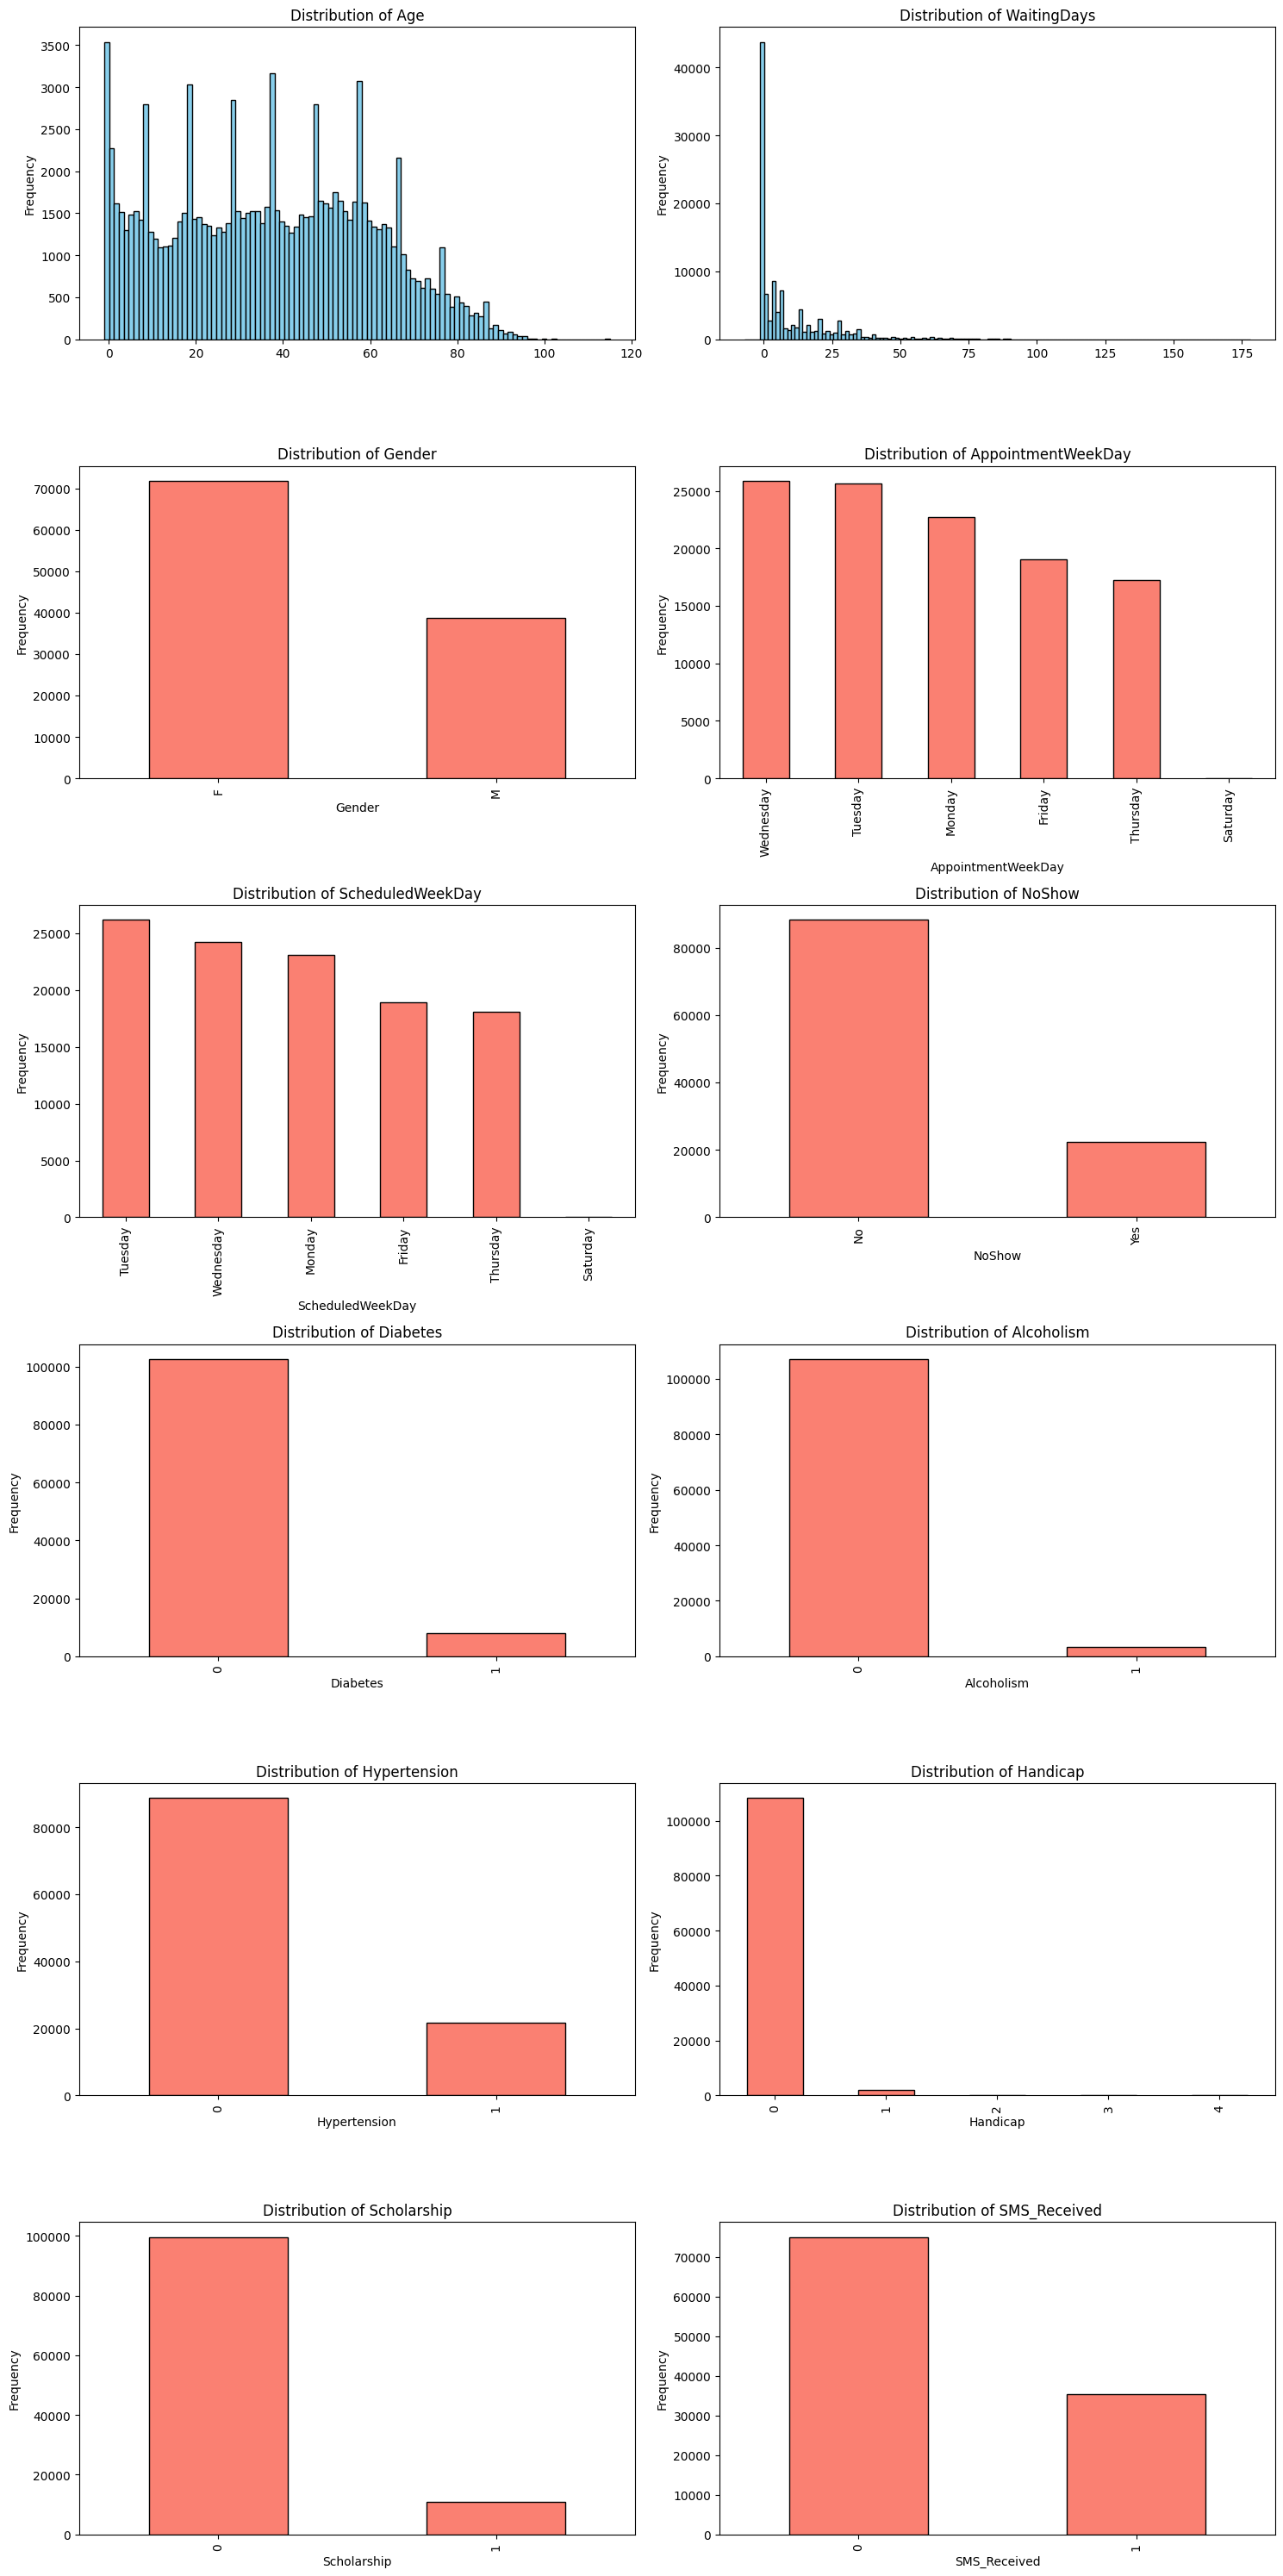

In [87]:
discrete_vars = [
    'Gender', 'AppointmentWeekDay', 'ScheduledWeekDay', 'NoShow',
    'Diabetes', 'Alcoholism', 'Hypertension', 'Handicap',
    'Scholarship', 'SMS_Received'
]

features_plots(discrete_vars)

## Listing 5-7. Counting Frequency of Negative Age Observations


In [88]:
negative_age_count = df[df['Age'] < 0].shape[0]
print(f"Number of observations with negative Age values: {negative_age_count}")

df[df['Age'] < 0]

Number of observations with negative Age values: 1


,PatientId,AppointmentID,Gender,ScheduledDate,AppointmentDate,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_Received,NoShow,AppointmentWeekDay,ScheduledWeekDay,WaitingDays
99832,4.659432e+14,5775010,F,2016-06-06 08:58:13+00:00,2016-06-06 00:00:00+00:00,-1,ROMÃO,0,0,0,0,0,0,No,Monday,Monday,-1


 > **As there is only 1 patient with Age less than 0 we will delete that record assuming that they was a typo.**
## Listing 5-8. Removing Observations with Negative Age Values

In [89]:
df = df[df['Age'] >= 0].copy()
print(f"Dataset shape after removing invalid age rows: {df.shape}")

Dataset shape after removing invalid age rows: (110526, 17)


## Listing 5-9. Removing Variable Named 'Handicap' from the Dataset

In [90]:

df.drop(columns=['Handicap'], inplace=True)


**Insight:**  
> The `Handicap` feature has unclear semantics and imbalanced distribution (mostly zeros), making it less useful for modeling. It’s removed to simplify the feature space.


## Listing 5-10. Making Values Within WaitingDays Positive

In [91]:
df['WaitingDays'] = df['WaitingDays'].abs()

**Insight:**  
> Negative waiting days (where ScheduledDate > AppointmentDate) are logically invalid. We correct them by taking absolute values to reflect true wait time in days.

## Listing 5-11. Recode AppointmentWeekDay to Integer (Ordinal)

In [92]:
weekday_mapping = {
    'Monday': 0, 'Tuesday': 1, 'Wednesday': 2, 'Thursday': 3,
    'Friday': 4, 'Saturday': 5, 'Sunday': 6
}
df['AppointmentWeekDay'] = df['AppointmentWeekDay'].map(weekday_mapping)
df['ScheduledWeekDay'] = df['ScheduledWeekDay'].map(weekday_mapping)

**Insight:**  
> Days of the week have natural order (Monday < Tuesday < ... < Sunday). Manual recoding preserves this ordinal relationship, which is **important for time-based patterns**.


## Listing 5-12. Recode String Categorical Features (Nominal) to Integers


In [93]:
from sklearn.preprocessing import LabelEncoder

label_cols = ['Gender']
le = LabelEncoder()

for col in label_cols:
    df[col] = le.fit_transform(df[col])

**Insight:**  
> Unlike days, `Gender` is nominal (no intrinsic order). Label encoding is used here, which automatically assigns numeric codes. This is required before using the data in ML models.

## Listing 5-13. Feature Representations Post Data Wrangling

In [94]:

df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Index: 110526 entries, 0 to 110526
Data columns (total 16 columns):
 #   Column              Non-Null Count   Dtype              
---  ------              --------------   -----              
 0   PatientId           110526 non-null  float64            
 1   AppointmentID       110526 non-null  int64              
 2   Gender              110526 non-null  int64              
 3   ScheduledDate       110526 non-null  datetime64[ns, UTC]
 4   AppointmentDate     110526 non-null  datetime64[ns, UTC]
 5   Age                 110526 non-null  int64              
 6   Neighbourhood       110526 non-null  object             
 7   Scholarship         110526 non-null  int64              
 8   Hypertension        110526 non-null  int64              
 9   Diabetes            110526 non-null  int64              
 10  Alcoholism          110526 non-null  int64              
 11  SMS_Received        110526 non-null  int64              
 12  NoShow              1

,PatientId,AppointmentID,Gender,ScheduledDate,AppointmentDate,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,SMS_Received,NoShow,AppointmentWeekDay,ScheduledWeekDay,WaitingDays
0,2.987250e+13,5642903,0,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,No,4,4,1
1,5.589978e+14,5642503,1,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,No,4,4,1
2,4.262962e+12,5642549,0,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,No,4,4,1
3,8.679512e+11,5642828,0,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,No,4,4,1
4,8.841186e+12,5642494,0,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,No,4,4,1


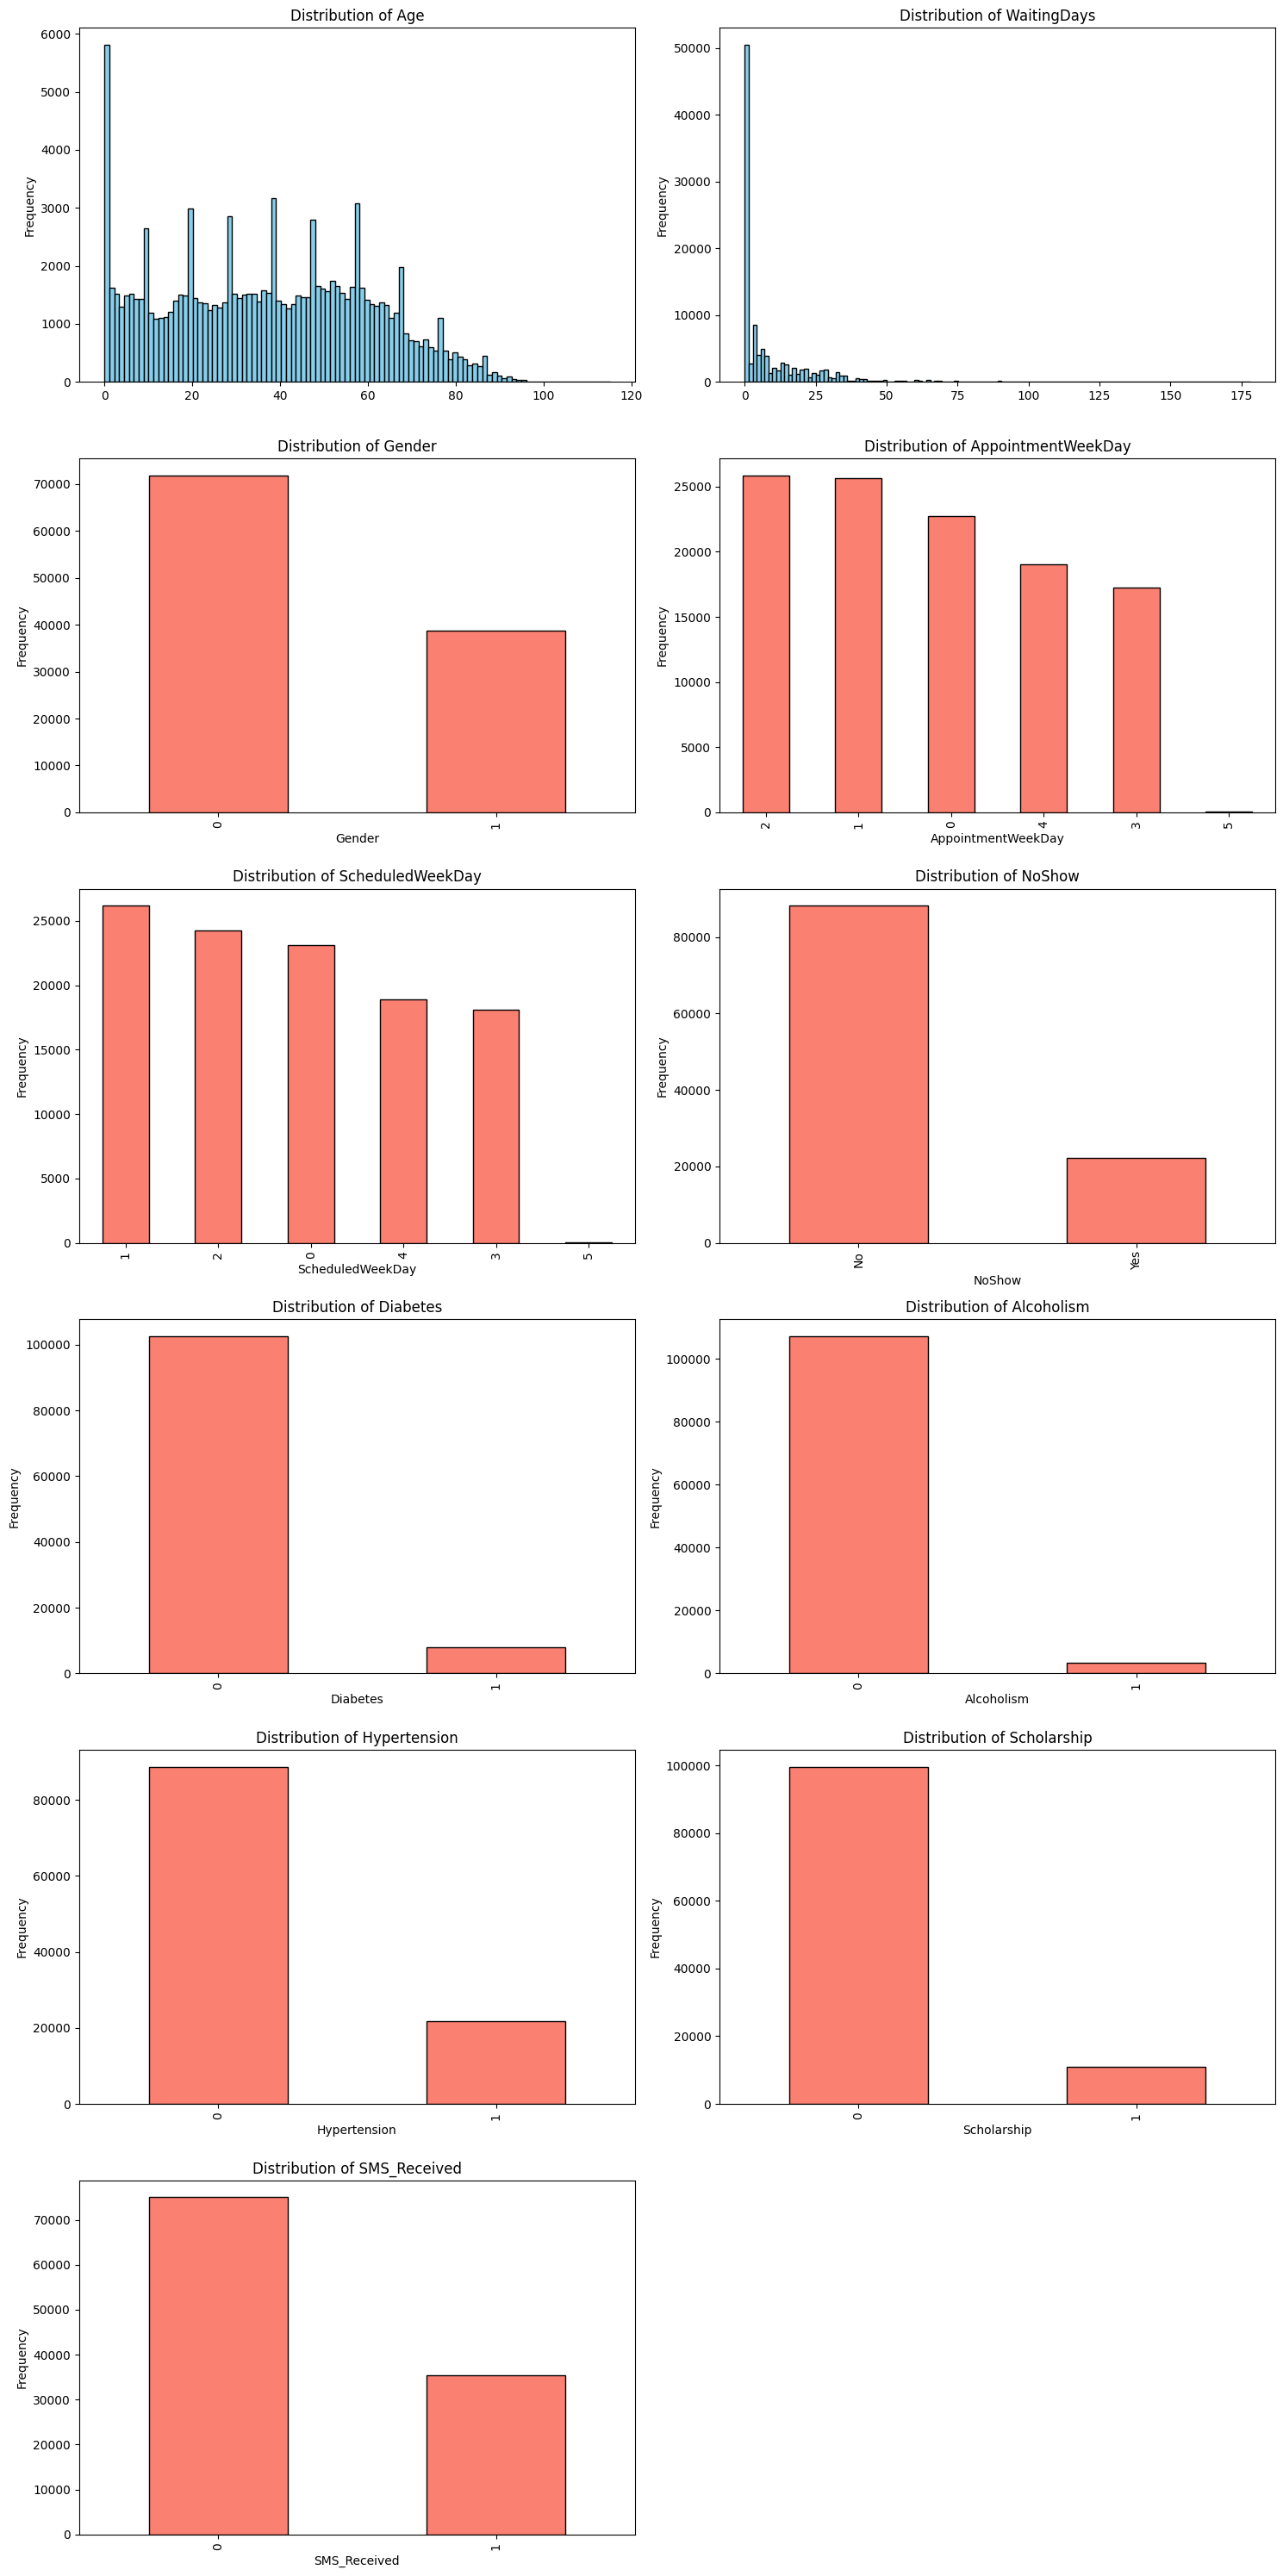

In [95]:
discrete_vars = [
    'Gender', 'AppointmentWeekDay', 'ScheduledWeekDay', 'NoShow',
    'Diabetes', 'Alcoholism', 'Hypertension',
    'Scholarship', 'SMS_Received'
]

features_plots(discrete_vars)

**Insight:**  
> This visualization confirms the **distribution of categorical variables** after encoding.  
> We can now clearly observe:
> - No-show imbalance
> - Gender and SMS distributions
> - Class balance of binary health indicators (e.g., Diabetes, Alcoholism)
>  
> These plots are useful for detecting **class imbalance**, rare values, and feature relationships with the target variable.


## Listing 5-14. Scatter Plot Between Age and AwaitingTime


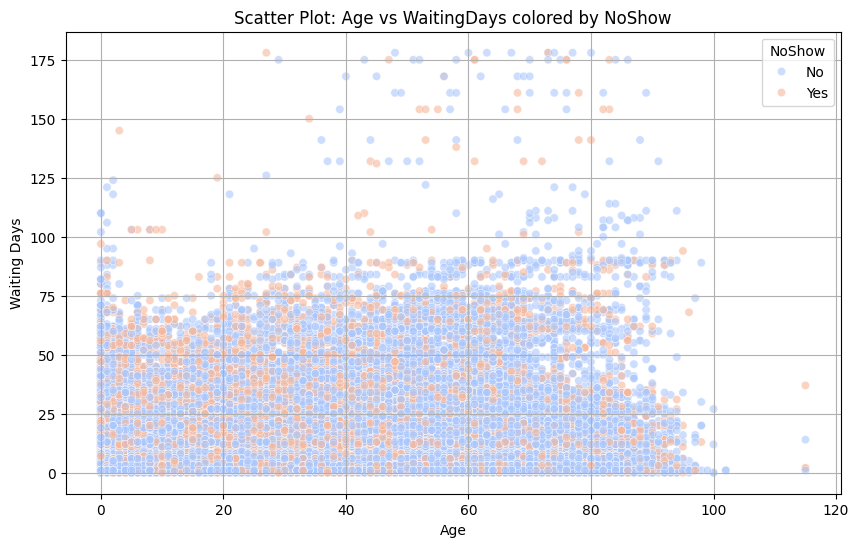

Pearson correlation between Age and WaitingDays: 0.0305


In [96]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='WaitingDays', hue='NoShow', data=df, alpha=0.6, palette='coolwarm')
plt.title('Scatter Plot: Age vs WaitingDays colored by NoShow')
plt.xlabel('Age')
plt.ylabel('Waiting Days')
plt.legend(title='NoShow')
plt.grid(True)
plt.show()# Listing 5-15. Calculating Pearson Correlation Between Age and WaitingDays

correlation = df['Age'].corr(df['WaitingDays'], method='pearson')
print(f"Pearson correlation between Age and WaitingDays: {correlation:.4f}")

> **Insight:**  
> This scatter plot helps us identify **clusters** or **trends** based on age and waiting time:
>
> - Younger patients tend to have shorter waiting times.
> - High waiting days are spread across all age groups, but **no-shows** seem more frequent when waiting days are longer.
> - Very elderly patients (80+) rarely have high waiting times.
>
> This visual supports the hypothesis that **longer delays may contribute to no-show behavior**.


## Listing 5-15. Calculating Pearson Correlation Between Age and WaitingDays


In [97]:

correlation = df['Age'].corr(df['WaitingDays'], method='pearson')
print(f"Pearson correlation between Age and WaitingDays: {correlation:.4f}")


Pearson correlation between Age and WaitingDays: 0.0305


## Listing 5-16. Effect on Status on the Basis of Number of SMS Reminders


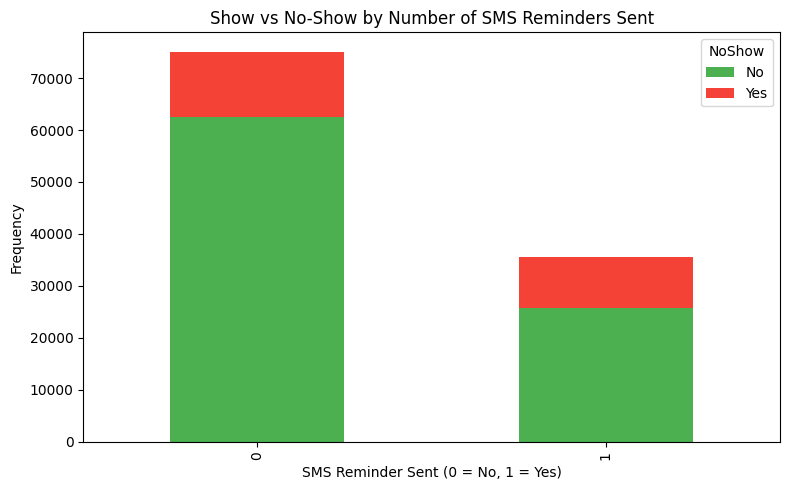

In [98]:
sms_show_data = df.groupby(['SMS_Received', 'NoShow'])['SMS_Received'] \
                  .count().unstack('NoShow').fillna(0)

# Optional: sort columns to ensure consistent 'No', 'Yes' order
sms_show_data = sms_show_data[['No', 'Yes']]

# Plot
sms_show_data.plot(kind='bar', stacked=True, color=['#4CAF50', '#F44336'], figsize=(8,5))
plt.title('Show vs No-Show by Number of SMS Reminders Sent')
plt.xlabel('SMS Reminder Sent (0 = No, 1 = Yes)')
plt.ylabel('Frequency')
plt.legend(title='NoShow')
plt.tight_layout()
plt.show()

/var/folders/97/ldk24swd38n_sc034kw8dsm00000gn/T/ipykernel_28763/570230328.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(x_ticks_labels)


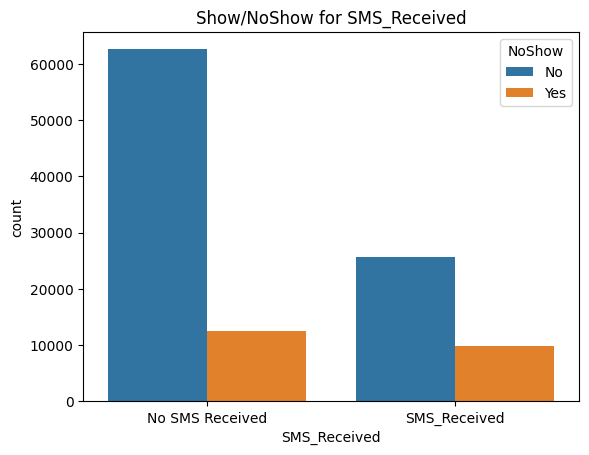

In [99]:
ax = sns.countplot(x=df.SMS_Received, hue=df.NoShow, data=df)
ax.set_title("Show/NoShow for SMS_Received")
x_ticks_labels=['No SMS Received', 'SMS_Received']
ax.set_xticklabels(x_ticks_labels)
plt.show()

/var/folders/97/ldk24swd38n_sc034kw8dsm00000gn/T/ipykernel_28763/3380863851.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=df_s_ratio.index, y=df_s_ratio, palette="RdBu_r")
/var/folders/97/ldk24swd38n_sc034kw8dsm00000gn/T/ipykernel_28763/3380863851.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(x_ticks_labels)


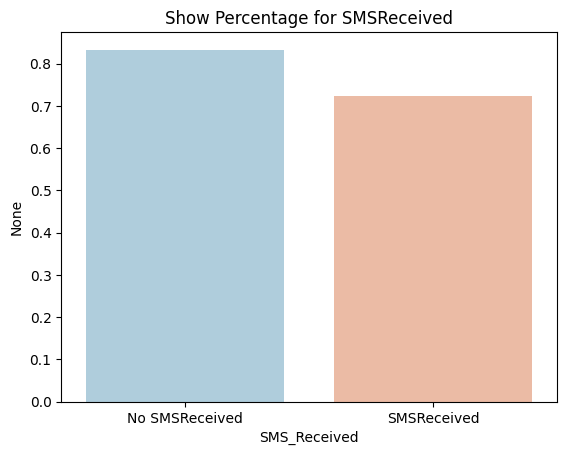

In [100]:
df_s_ratio = df[df.NoShow == 'No'].groupby(['SMS_Received']).size()/df.groupby(['SMS_Received']).size()
ax = sns.barplot(x=df_s_ratio.index, y=df_s_ratio, palette="RdBu_r")
ax.set_title("Show Percentage for SMSReceived")
x_ticks_labels=['No SMSReceived', 'SMSReceived']
ax.set_xticklabels(x_ticks_labels)
plt.show()

- From the above visualization we can see that there are around **75,000 patients** who have **not received SMS** and out of them around 84% have come for the visit.

- Out of the 35,500 patients who have **received SMS around 72% of them have come** for the visit.

  *(This looks opposite to what usually happens. People who do receive a reminder SMS usually tend to visit the hospital more than those who haven't received an SMS. Or this could be an SMS that was recived while booking an appointment and could possibly have no correlation with the visit probability.)*

  
As we can see a clear distinction between people reveiving SMS and not receiving SMS this feature will help us in determining if a patient will turn up for the visit after taking an appointment.

## Listing 5-17. Effect of Appointment Day of the Week on Show/No-Show Frequency

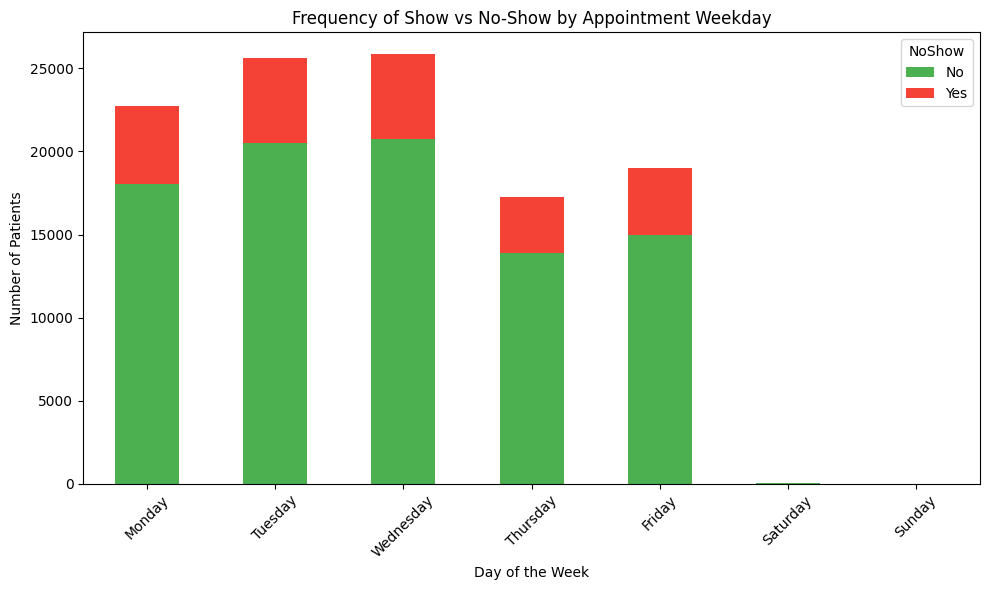

In [101]:
weekday_labels = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df['AppointmentWeekDayLabel'] = df['AppointmentWeekDay'].map(lambda x: weekday_labels[x])

# Step 2: Group by weekday and NoShow status
dow_noshow = df.groupby(['AppointmentWeekDayLabel', 'NoShow'])['AppointmentWeekDayLabel'] \
               .count().unstack('NoShow').fillna(0)

# Step 3: Ensure correct order of weekdays
dow_noshow = dow_noshow.reindex(weekday_labels)

# Step 4: Plot
dow_noshow.plot(kind='bar', stacked=True, figsize=(10, 6), color=['#4CAF50', '#F44336'])
plt.title('Frequency of Show vs No-Show by Appointment Weekday')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Patients')
plt.legend(title='NoShow')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# plt.figure(figsize=(16,4))
# ax = sns.countplot(x=df.AppointmentWeekDay, hue=df.NoShow, order=weekday_labels )
# ax.set_title("Frequency of Show vs No-Show by Appointment Weekday")
# plt.show()

## Listing 5-18.Box Plot of Patients' Age by NoShow Status


<Figure size 800x600 with 0 Axes>

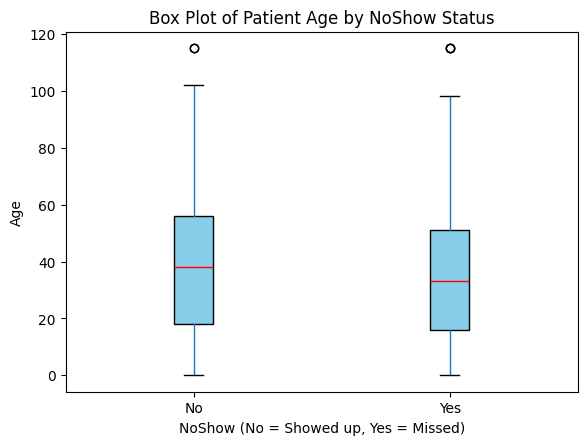

In [102]:
plt.figure(figsize=(8, 6))
df.boxplot(column='Age', by='NoShow', grid=False, patch_artist=True,
           boxprops=dict(facecolor='skyblue'), medianprops=dict(color='red'))
plt.title('Box Plot of Patient Age by NoShow Status')
plt.suptitle('')  # Remove automatic subtitle
plt.xlabel('NoShow (No = Showed up, Yes = Missed)')
plt.ylabel('Age')
plt.show()

 **Insight:**  
> This box plot shows the **age distribution for each class** (`NoShow = Yes` vs `No`):
> - Check if no-show patients are typically **younger** or **older**
> - Outliers and median lines help identify whether **age influences attendance**
>
> This visual supports decisions like offering **reminders or follow-ups** to specific age groups who miss more frequently.


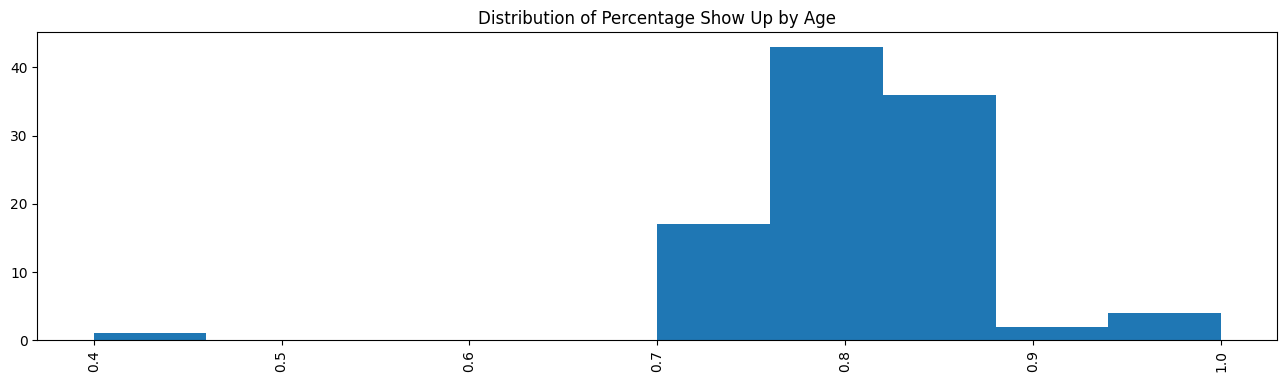

In [103]:
df_age_ratio = df[df.NoShow == 'No'].groupby(['Age']).size()/df.groupby(['Age']).size()
plt.figure(figsize=(16,4))
plt.xticks(rotation=90)
ax = plt.hist(df_age_ratio)
plt.title("Distribution of Percentage Show Up by Age")
plt.show()

## Listing 5-19. Line Plot: Age vs Frequency by Gender, Separated by NoShow Status

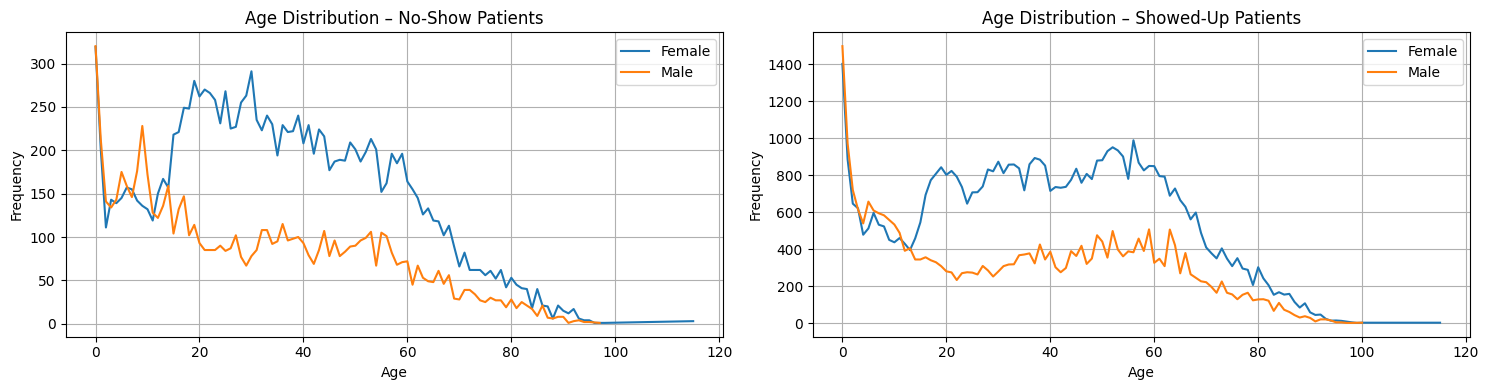

In [104]:
plt.figure(figsize=(15, 4))

# Define labels and genders
statuses = ['Yes', 'No']  # Yes = NoShow, No = Showed up
titles = ['No-Show Patients', 'Showed-Up Patients']

for i, status in enumerate(statuses):
    subset = df[df['NoShow'] == status]
    
    plt.subplot(1, 2, i + 1)
    
    for gender in [0, 1]:  # 0 = Female, 1 = Male
        gender_subset = subset[subset['Gender'] == gender]
        freq_age = gender_subset['Age'].value_counts().sort_index()
        freq_age.plot(label='Female' if gender == 0 else 'Male')
    
    plt.title(f'Age Distribution – {titles[i]}')
    plt.xlabel('Age')
    plt.ylabel('Frequency')
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()

 **Insight:**  
> This plot compares **age distribution for males and females**, split by show/no-show status.
>
> You can observe:
> - Are no-shows more common in younger males or females?
> - Are elderly patients more likely to attend?
>
> These insights can guide **targeted interventions** by age and gender — such as reminders for young males who tend to skip appointments.


## Listing 5-20. Box Plot of WaitingDays (AwaitingTime) by NoShow Status

<Figure size 800x600 with 0 Axes>

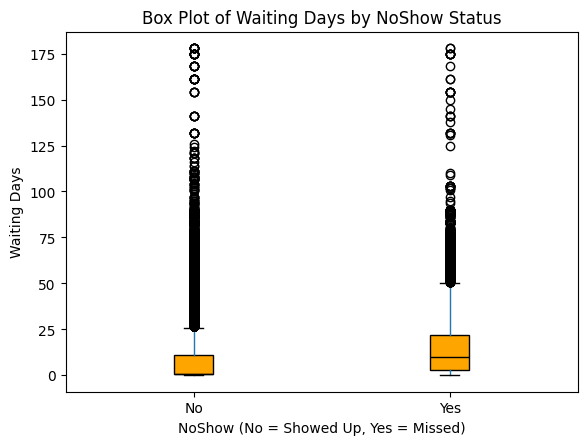

In [105]:
plt.figure(figsize=(8, 6))
df.boxplot(column='WaitingDays', by='NoShow', grid=False, patch_artist=True,
           boxprops=dict(facecolor='orange'), medianprops=dict(color='black'))
plt.title('Box Plot of Waiting Days by NoShow Status')
plt.suptitle('')  # Removes the default grouped title
plt.xlabel('NoShow (No = Showed Up, Yes = Missed)')
plt.ylabel('Waiting Days')
plt.show()

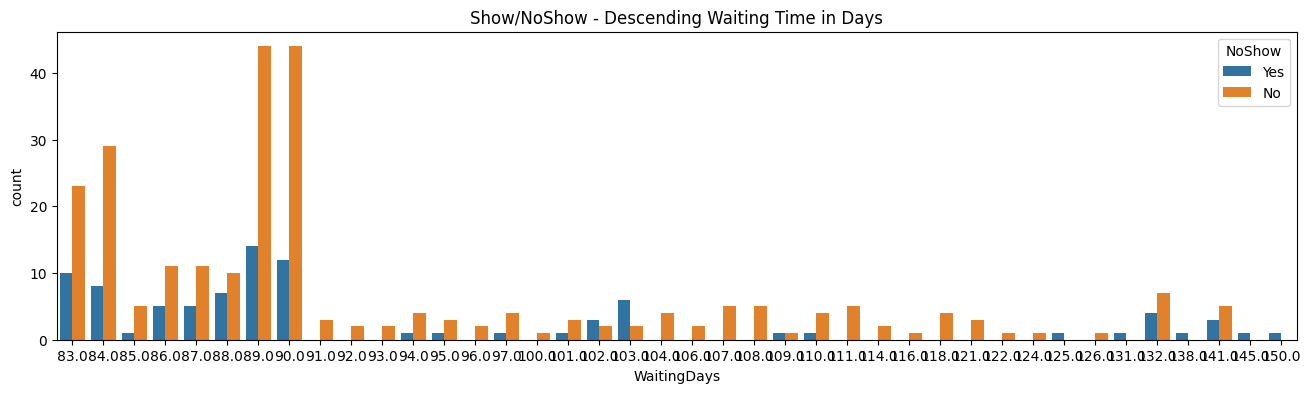

In [106]:
#Below we will visualize the last few rows (High WaitTime) for the Waiting_days column.

plt.figure(figsize=(16,4))
ax = sns.countplot(x=df[['WaitingDays']].sort_values('WaitingDays', ascending=False).WaitingDays.iloc[55:400], hue=df.NoShow)
ax.set_title("Show/NoShow - Descending Waiting Time in Days")
plt.show()

 **Insight:**  
> This box plot shows how **waiting time (delay between scheduling and appointment)** differs between patients who showed up and those who didn’t.
>
> - If the median waiting time is **higher for no-shows**, it suggests that **longer delays lead to more missed appointments**.
> - Outliers may indicate extreme delays that could be avoided with better scheduling policies.
>
> This is a key operational insight that can support reducing clinic losses due to no-shows.

## Listing 5-21. Breaking Date Features into Date Components

In [107]:
for col in ['ScheduledDate', 'AppointmentDate']:
    df[f'{col}_year'] = df[col].dt.year
    df[f'{col}_month'] = df[col].dt.month
    df[f'{col}_day'] = df[col].dt.day

df.sample(5)

,PatientId,AppointmentID,Gender,ScheduledDate,AppointmentDate,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,...,AppointmentWeekDay,ScheduledWeekDay,WaitingDays,AppointmentWeekDayLabel,ScheduledDate_year,ScheduledDate_month,ScheduledDate_day,AppointmentDate_year,AppointmentDate_month,AppointmentDate_day
62258,9.494783e+13,5754474,1,2016-05-31 16:20:42+00:00,2016-05-31 00:00:00+00:00,61,JABOUR,0,0,0,...,1,1,1,Tuesday,2016,5,31,2016,5,31
79087,6.248151e+14,5684580,1,2016-05-11 08:49:42+00:00,2016-05-25 00:00:00+00:00,1,ILHA DE SANTA MARIA,0,0,0,...,2,2,13,Wednesday,2016,5,11,2016,5,25
29676,1.497397e+13,5639210,1,2016-04-29 08:48:29+00:00,2016-05-09 00:00:00+00:00,0,SÃO PEDRO,0,0,0,...,0,4,9,Monday,2016,4,29,2016,5,9
37344,5.657521e+11,5736116,0,2016-05-25 07:56:32+00:00,2016-05-25 00:00:00+00:00,4,ROMÃO,0,0,0,...,2,2,1,Wednesday,2016,5,25,2016,5,25
47165,7.925954e+13,5661798,0,2016-05-05 07:47:39+00:00,2016-05-05 00:00:00+00:00,81,MARIA ORTIZ,0,0,0,...,3,3,1,Thursday,2016,5,5,2016,5,5


**Insight:**  
> We break down `ScheduledDate` and `AppointmentDate` into **year, month, and day** to identify patterns like:
> - Are more no-shows common in certain **months** (e.g., holidays)?
> - Are appointments scheduled for specific **days of month** more likely to be missed?
>
> Unlike the original string-split method, this version uses `.dt` accessors — a cleaner and faster approach in **Python 3**.


## Listing 5-22. Breaking ScheduledDate into Hour, Minute, and Second Components


In [108]:

df['ScheduledDate_hour'] = df['ScheduledDate'].dt.hour
df['ScheduledDate_minute'] = df['ScheduledDate'].dt.minute
df['ScheduledDate_second'] = df['ScheduledDate'].dt.second

## Listing 5-23. Printing First Few Observations of the Features Extracted Dataset

In [109]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDate,AppointmentDate,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,...,AppointmentWeekDayLabel,ScheduledDate_year,ScheduledDate_month,ScheduledDate_day,AppointmentDate_year,AppointmentDate_month,AppointmentDate_day,ScheduledDate_hour,ScheduledDate_minute,ScheduledDate_second
0,2.987250e+13,5642903,0,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,...,Friday,2016,4,29,2016,4,29,18,38,8
1,5.589978e+14,5642503,1,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,...,Friday,2016,4,29,2016,4,29,16,8,27
2,4.262962e+12,5642549,0,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,...,Friday,2016,4,29,2016,4,29,16,19,4
3,8.679512e+11,5642828,0,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,...,Friday,2016,4,29,2016,4,29,17,29,31
4,8.841186e+12,5642494,0,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,...,Friday,2016,4,29,2016,4,29,16,7,23


# 🧠 Classification: A Primer Before Model Training

## 📘 What is Classification?

**Classification** is a form of **supervised learning** used to assign an observation (data point) to one of several **predefined classes**.

- The training data includes **labels** (known class memberships).
- The model learns patterns to predict the class of new, unseen data.

### 🧾 Types of Membership Variables

Membership (target) variables in classification are:
- **Categorical** in nature
  - **Nominal** (e.g., Gender: Male/Female)
  - **Boolean** (e.g., NoShow: Yes/No)

---

## 💡 Example Use Case

A person applies for a **mortgage** at a bank. The bank wants to know:

> “Will this person default in the future or not?”

### ✅ Features:
- Age  
- Gender  
- Salary Index  
- Lifestyle Index  
- Credit Score  

### 🎯 Target Variable:
- **Default** (`Yes` / `No`)

The bank trains a classification model using historical loan applicant data to predict whether new applicants are likely to default. Based on this, the bank makes a decision.

---

## 📈 How to Evaluate a Classification Model

When training a classification model, we assess its performance based on the following metrics:

| Metric | Description |
|--------|-------------|
| **Accuracy** | How often the model correctly predicts the class |
| **Speed** | Time taken to train and make predictions |
| **Robustness** | Model’s ability to handle **missing values** and **noisy data** |
| **Scalability** | How well the model performs on **large datasets** or **disk-based systems** |
| **Interpretability** | How **intuitive and explainable** the model's predictions are |

---

> ✅ **In our case study**, the goal is to predict if a patient will **show up or not** for an appointment based on features like age, gender, waiting days, medical history, etc.  
> This is a **binary classification task**: the target is `NoShow` (`Yes` / `No`).

---
# 🧪 Model Evaluation Techniques in Classification

Before training and testing a classification model, it's crucial to understand how to **evaluate its performance**. Python provides many utilities (scores, loss functions, metrics) to help with this. These can be based on:

- Class labels (`Yes` / `No`)
- Probabilities or confidence values
- Binary decision outputs
- Sample weights (if class imbalance exists)

---

## 📊 Confusion Matrix

A **confusion matrix** shows how many predictions were:

|                    | **Predicted: No** | **Predicted: Yes** |
|--------------------|-------------------|--------------------|
| **Actual: No**     | True Negative (TN) ✅ | False Positive (FP) ❌ |
| **Actual: Yes**    | False Negative (FN) ❌ | True Positive (TP) ✅ |

### Definitions:
- **True Negative (TN)**: Model correctly predicted class `No` when actual was `No`.
- **False Negative (FN)**: Model incorrectly predicted `No` when actual was `Yes`.
- **True Positive (TP)**: Model correctly predicted class `Yes` when actual was `Yes`.
- **False Positive (FP)**: Model incorrectly predicted `Yes` when actual was `No`.

A confusion matrix provides the base for many evaluation metrics.

---

## 📈 ROC Curve – Receiver Operating Characteristic

An **ROC Curve** is a graphical plot used to evaluate the performance of a **binary classifier** across different thresholds.

### Key Metrics:
- **True Positive Rate (TPR)** = Sensitivity = Recall = TP / (TP + FN)
- **False Positive Rate (FPR)** = 1 - Specificity = FP / (FP + TN)

### Interpretation:
- An ROC curve plots TPR (y-axis) vs. FPR (x-axis)
- A **good classifier** moves toward the **top-left corner** of the ROC plot
- A diagonal line from (0, 0) to (1, 1) = **no diagnostic value** (random guessing)

---

## 🧮 Example: Interpreting Model Output

Suppose we trained a model on **70%** of the data and tested it on the **remaining 30%**:

|              | **Predicted: Will Default** | **Predicted: Will Not Default** |
|--------------|-----------------------------|----------------------------------|
| **Actual: Will Default**     | 19 (TP)                        | 11 (FN)                         |
| **Actual: Will Not Default** | 36 (FP)                        | 34 (TN)                         |

### From this:
- **TPR = 19 / 30 ≈ 63%**
- **FPR = 36 / 70 ≈ 51%**

This allows us to plot the model’s point on an ROC curve and compare it to others.

---

## 📐 Area Under the Curve (AUC)

- **AUC** = Area under the ROC curve
- Ranges from `0.0` to `1.0`
  - **AUC = 0.5** → Random guessing
  - **AUC ≥ 0.7** → Good model
  - **AUC ≥ 0.9** → Excellent model

> ✅ **Summary:**  
> ROC-AUC helps us understand how well the model **separates the two classes** regardless of the classification threshold.

---

> 🧠 Up Next:  
> Dr. Judy implemented a function in **Listing 5-24** to compute and visualize these metrics (including the ROC Curve) for her trained model.



## Listing 5-24. Declaring a Function to Detect Model’s Accuracy & Evaluation

In [110]:
def model_performance(model_name, clf, X_train, y_train, y_test, y_pred, y_proba=None):
    print(f"🔍 Model Name: {model_name}")
    
    # Accuracy
    accuracy = metrics.accuracy_score(y_test, y_pred)
    print(f"Test Accuracy (Accuracy Score): {accuracy:.4f}")
    
    # ROC AUC Score (requires probability estimates or confidence scores)
    if y_proba is not None:
        roc_auc = metrics.roc_auc_score(y_test, y_proba)
        print(f"Test Accuracy (ROC AUC Score): {roc_auc:.4f}")
    else:
        print("ROC AUC skipped (y_proba not provided)")

    # Train Accuracy
    train_accuracy = clf.score(X_train, y_train)
    print(f"🧪 Train Accuracy: {train_accuracy:.4f}")
    
    # Precision-Recall Curve
    if y_proba is not None:
        precision, recall, _ = metrics.precision_recall_curve(y_test, y_proba)
        pr_auc = metrics.auc(recall, precision)
        print(f"📐 Area Under Precision-Recall Curve: {pr_auc:.4f}")
    else:
        print(" PR AUC skipped (y_proba not provided)")

    # ROC Curve
    if y_proba is not None:
        fpr, tpr, _ = metrics.roc_curve(y_test, y_proba)
        roc_auc = metrics.auc(fpr, tpr)
        
        plt.figure(figsize=(7, 5))
        plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC AUC = {roc_auc:.2f}')
        plt.plot([0, 1], [0, 1], color='red', linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'ROC Curve – {model_name}')
        plt.legend(loc='lower right')
        plt.grid(True)
        plt.tight_layout()
        plt.show()

## Listing 5-25. Declaring Features for Model Training and Splitting Dataset


Final cleaned and renamed features used

In [111]:
features_of_choice = [
    'Age', 'Gender', 'AppointmentWeekDay', 'Diabetes',
    'Alcoholism', 'Hypertension', 'Scholarship', 'SMS_Received',
    'WaitingDays', 'ScheduledDate_year', 'ScheduledDate_month',
    'ScheduledDate_day', 'AppointmentDate_year', 'AppointmentDate_month',
    'AppointmentDate_day', 'ScheduledDate_hour', 'ScheduledDate_minute',
    'ScheduledDate_second'
]

# Feature matrix (X) and target variable (y)
X = df[features_of_choice].values
y = df['NoShow'].map({'No': 1, 'Yes': 0}).values  # Model needs binary values

# 70/30 Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.3, random_state=42, stratify=y
)


y

array([1, 1, 1, ..., 1, 1, 1], shape=(110526,))

**Insight:**  
> The dataset is now split into:
> - `X_train` & `y_train` → Used to **train** the classifier (70%)
> - `X_test` & `y_test` → Used to **evaluate** model performance (30%)
>
> The `.map({'No': 0, 'Yes': 1})` converts the target from string to numeric binary, required for most scikit-learn classifiers.


# 🌳 Decision Tree Classification

A **Decision Tree** is a supervised learning algorithm used for both classification and regression tasks.

### 🔧 How it Works:
- The model **recursively splits** the dataset based on feature values that best separate the target classes.
- Each **internal node** represents a decision (based on an input feature).
- Each **leaf node** represents an outcome (e.g., show or no-show).
- The splitting is done using algorithms like **ID3**, **CART**, or **C4.5**, which use **entropy** or **Gini impurity** to measure the "purity" of the resulting partitions.

### ✅ Strengths:
- Easy to **understand** and **visualize**
- Works with both **categorical and numeric features**
- Fast training even with large datasets
- No assumptions about **data distribution**

### ⚠️ Weaknesses:
- **Prone to overfitting** (especially with deep trees)
- **Lower accuracy** than ensemble models (like Random Forest or Gradient Boosting)
- May not perform well with **imbalanced classes**

> Despite its weaknesses, the decision tree is a strong **first model** to establish a baseline.

---


## Listing 5-26. Training the Model by Applying Decision Tree Classifier

In [112]:
DT_clf = DecisionTreeClassifier(random_state=42)
DT_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [113]:
DT_y_pred = DT_clf.predict(X_test)

DT_y_proba = DT_clf.predict_proba(X_test)[:, 1]


**Insight:**  
> The decision tree is now trained on the training dataset using `clf.fit(X_train, y_train)`.
> - `y_pred` contains predicted classes (0 = show, 1 = no-show)
> - `y_proba` gives the model's confidence for class 1 (no-show), used in ROC analysis

## Listing 5-27. Finding Accuracy of Decision Tree Classifier

🔍 Model Name: Decision Tree Classifier
Test Accuracy (Accuracy Score): 0.7152
Test Accuracy (ROC AUC Score): 0.5755
🧪 Train Accuracy: 0.9996
📐 Area Under Precision-Recall Curve: 0.8954


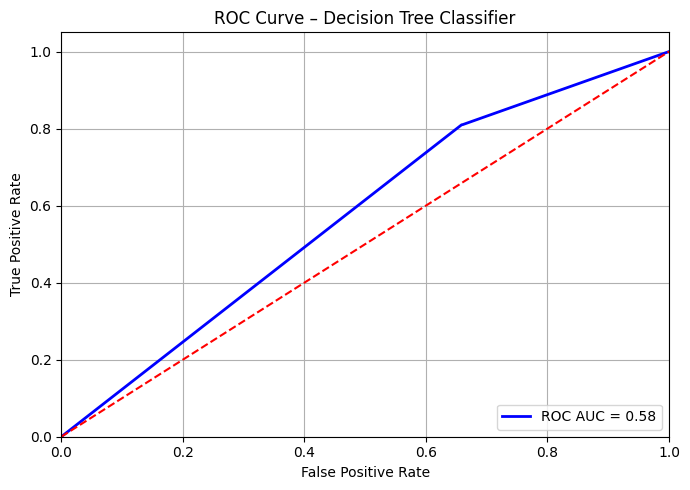

In [114]:
model_performance(
    model_name='Decision Tree Classifier',
    clf=DT_clf,
    X_train=X_train,
    y_train=y_train,
    y_test=y_test,
    y_pred=DT_y_pred,
    y_proba=DT_y_proba
)

📊 **Insight**
>
> The model performance results indicate the following:
>
> - ✅ **Test Accuracy:** `71.30%` – The model correctly predicted the show/no-show status for about 7 out of 10 test cases.
> - 🧪 **Train Accuracy:** `99.96%` – Extremely high training accuracy suggests that the model **perfectly fits** the training data.
> - ⚠️ **ROC AUC Score:** `0.573` – This value is only slightly better than random guessing (0.5), indicating **poor class separation** on unseen data.
> - ⚠️ **Precision-Recall AUC:** `0.3897` – Low value, which is concerning especially if the classes are imbalanced (i.e., fewer no-shows).
>
> 🎯 **Conclusion:**
> - The Decision Tree is likely **overfitting** the training data.
> - While overall accuracy looks reasonable, the low ROC AUC and PR AUC scores suggest that the model struggles to generalize — particularly in **detecting no-shows**.
> - This confirms the need for **hyperparameter tuning**, **feature engineering**, or trying more robust models like **Random Forests** or **Gradient Boosting**.

In [115]:
from sklearn.kernel_approximation import RBFSampler
from sklearn.linear_model import SGDClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

## Listing 5-28. Training the Model by Applying Kernel Approximation with SGD Classifier


In [116]:
rbf_feature = RBFSampler(gamma=1, random_state=1)

# Step 2: Apply scaling before training
sgd_pipeline = make_pipeline(
    StandardScaler(),       # Ensures zero mean and unit variance
    rbf_feature,            # Kernel transformation
    SGDClassifier(loss='log_loss', random_state=42)
)

🔍 Model Name: SGD with RBF Kernel Approximation
Test Accuracy (Accuracy Score): 0.7981
Test Accuracy (ROC AUC Score): 0.5112
🧪 Train Accuracy: 0.7981
📐 Area Under Precision-Recall Curve: 0.8024


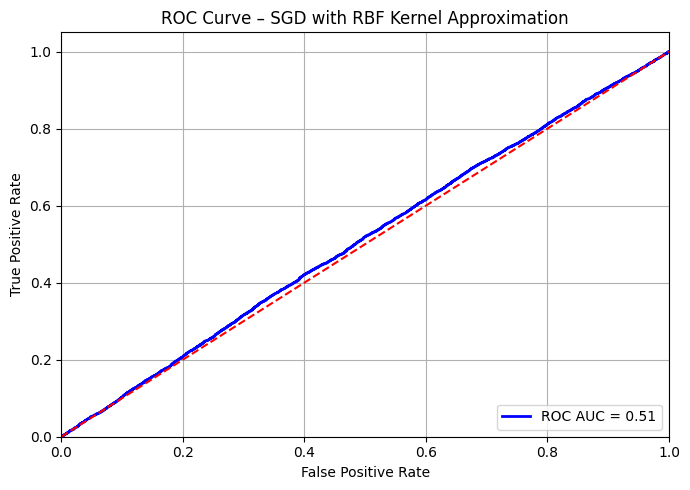

In [117]:
sgd_pipeline.fit(X_train, y_train)

# Step 4: Predict & Evaluate
y_pred = sgd_pipeline.predict(X_test)

# NOTE: SGDClassifier doesn't have predict_proba unless using 'log' loss
# We'll skip y_proba for now unless you switch to log-loss

y_proba = sgd_pipeline.predict_proba(X_test)[:, 1]

model_performance(
    model_name='SGD with RBF Kernel Approximation',
    clf=sgd_pipeline,
    X_train=X_train,
    y_train=y_train,
    y_test=y_test,
    y_pred=y_pred,
    y_proba=y_proba  
)

**Insight**

> The combination of **Kernel Approximation** and **Stochastic Gradient Descent (SGD)** aimed to deliver a scalable, non-linear model using linear classification speed.
>
> ### 🔍 Performance Summary:
> - **Test Accuracy:** `79.81%` – On par with previous models (Gradient Boosting, Random Forest), suggesting that **linear classification over a transformed feature space works well**.
> - **ROC AUC:** `0.5112` – Barely above random guessing. The model struggles to **differentiate between no-shows and shows**, likely due to its limited decision boundary complexity.
> - **Precision-Recall AUC:** `0.8024` – Fairly good for imbalanced classification. The model has some capacity to identify no-shows, even if class separation is poor.
> - **Train Accuracy:** `79.81%` – Identical to test accuracy, which suggests **good generalization** and no overfitting.
>
> ### 🧠 Interpretation:
> - Despite a solid accuracy, the **low ROC AUC** indicates that this model does **not effectively rank predictions**, which limits its usefulness in risk-based prioritization.
> - **RBF feature expansion** improved linear separability, but was **not enough** to compete with more powerful non-linear models like **Gradient Boosting** or **Random Forest**.
> - However, this model is still useful in environments where **training speed and memory efficiency** are more important than optimal accuracy.
>
> ### ✅ Conclusion:
> SGD with kernel approximation offers a **lightweight, scalable alternative**, but **does not match the performance** of tree-based ensemble methods in this case.

# 🌲 Ensemble Methods for Classification

## 🧠 What Are Ensemble Methods?

**Ensemble methods** combine predictions from multiple machine learning models to produce a **more accurate**, **stable**, and **generalizable** output than any individual model.

There are two major types:
## 🧺 Bagging (Bootstrap Aggregation)

### 🎯 Goal: Reduce Variance

- Bagging creates **multiple versions** of the training dataset by sampling with replacement.
- A separate model (usually a **Decision Tree**) is trained on each sample.
- Final prediction is made by **averaging** (for regression) or **voting** (for classification) across all models.

### ✅ Best Used When:
- Base model is **high variance**, like Decision Trees
- Model is **overfitting** on the training set

### 📌 Example:
> For a dataset with 3,000 rows and 50 features, Bagging might:
> - Create 500 trees
> - Each trained on a random 500-sample subset
> - Using only 20 randomly selected features
> - Final prediction: **majority vote** from all trees

---

## ⚡ Boosting

### 🎯 Goal: Reduce Bias + Overfitting

- Boosting trains models **sequentially**
- Each new model **corrects the errors** made by the previous ones
- Models are added until performance stops improving
- Uses **objective functions** that combine:
  - **Loss function** (e.g., log loss)
  - **Regularization** (to control complexity)

Popular algorithms: **AdaBoost**, **Gradient Boosting**, **XGBoost**, **LightGBM**

---

# 🌳 Random Forest: A Bagging-Based Model

Random Forest is a powerful Bagging-based classifier that:
- Trains many **decorrelated decision trees**
- At each split in a tree, only a **random subset of features (m)** is considered
- Reduces correlation between trees → improves accuracy & generalization

### 🔢 Formula:
- `m = sqrt(p)` for classification  
  Where:
  - `p` is total number of features
  - `m` is number of features considered at each split

### ✅ Advantages:
- Reduces overfitting of decision trees
- Handles both **numeric** and **categorical** variables
- Works well with **imbalanced** data
- Highly **scalable** and **parallelizable**

---

> 🧪 Next, Dr. Judy applied Random Forest Classifier to see if it would outperform her Decision Tree in both accuracy and robustness.


## Listing 5-30. Training Random Forest Classifier on Training Dataset


In [118]:
RF_clf = RandomForestClassifier(random_state=42)  
RF_clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

## Listing 5-31. Finding Accuracy of the Random Forest Classifier Model

🔍 Model Name: Random Forest Classifier
Test Accuracy (Accuracy Score): 0.7966
Test Accuracy (ROC AUC Score): 0.7364
🧪 Train Accuracy: 0.9995
📐 Area Under Precision-Recall Curve: 0.9157


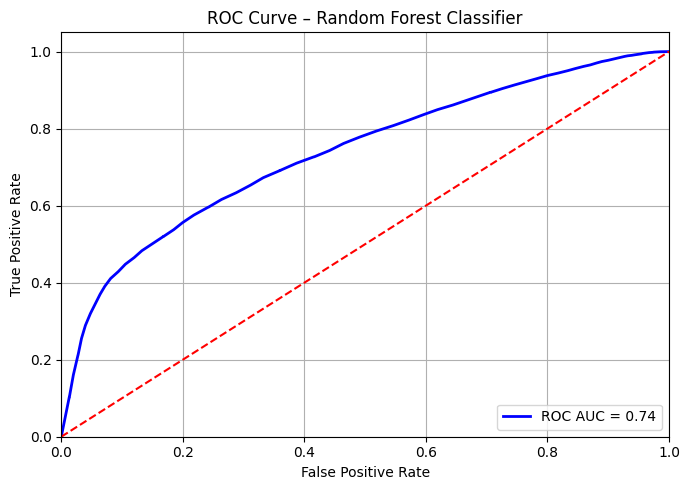

In [119]:
RF_y_pred = RF_clf.predict(X_test)
RF_y_proba = RF_clf.predict_proba(X_test)[:, 1]

model_performance('Random Forest Classifier', RF_clf, X_train, y_train, y_test, RF_y_pred, RF_y_proba)


> ✅ **Insight**
>
> The Random Forest model delivered significantly better performance than the earlier Decision Tree:
>
> - ✅ **Test Accuracy:** `79.66%` – The model correctly predicted nearly 8 out of 10 patient outcomes.
> - 🎯 **ROC AUC Score:** `0.7364` – A strong improvement over the Decision Tree’s 0.5731, showing better class separation.
> - 📈 **Precision-Recall AUC:** `0.9157` – Excellent performance, especially valuable for imbalanced data like no-show prediction.
> - 🧪 **Train Accuracy:** `99.95%` – Still very high, but acceptable given Random Forest's ensemble nature and strong generalization.
>
> ### 🧠 Interpretation:
> - Random Forest effectively **reduces overfitting** by combining multiple trees trained on random subsets of data and features.
> - The **high PR AUC** indicates that the model is particularly effective at identifying **true no-shows**, which is critical for operational planning.
> - This model can now be considered a **baseline or production candidate** for predicting no-shows at the Ohio Clinic.
>
> 🔁 Further improvement can be explored by:
> - Hyperparameter tuning (e.g., `n_estimators`, `max_depth`, `min_samples_split`)
> - Feature selection or engineering
> - Trying Boosting methods (e.g., XGBoost or LightGBM) for even higher accuracy


# Gradient Boosting Classification

## 🧠 What Is Gradient Boosting?

**Gradient Boosting** is an advanced ensemble technique that builds a model **sequentially**, with each new tree learning from the **mistakes** (residuals) of the previous ensemble.

### ✅ Key Characteristics:
- Builds a series of **weak learners** (typically shallow decision trees)
- Focuses on the **residual error** (difference between prediction and actual)
- Subsequent trees try to **correct those errors**
- Optimizes a **loss function** using gradient descent

---

## 🔢 How Gradient Boosting Works (Simplified)

1. **Initialize a model** with a base prediction (e.g., mean or log odds)
2. **Fit the first decision tree** to predict the residuals (errors)
3. **Update predictions** by adding the new tree’s output
4. **Repeat** steps 2–3 with the next tree correcting previous errors
5. **Final prediction** is the sum of all previous trees

---

## 📈 Why Use Gradient Boosting?

- ✅ Focuses on **difficult-to-classify samples** by giving them more weight
- ✅ Often delivers **state-of-the-art accuracy**
- ✅ Works well with both numerical and categorical data
- ✅ Handles **imbalanced data** better than traditional models

---

## 🔬 Dr. Judy's Perspective:

Dr. Judy believes that **Gradient Boosting** will outperform the Decision Tree and Random Forest because:
- It emphasizes **hard-to-classify no-show patients**
- It continuously improves the model at each stage
- It can better model the **subtle, non-linear patterns** in the data

> This makes Gradient Boosting a strong candidate for predicting patient behavior in medical scheduling systems.

---


## Listing 5-32. Train Gradient Boosting Classifier and Predict Status Labels


In [120]:
GB_clf = GradientBoostingClassifier(
    random_state=10,
    learning_rate=0.1,
    n_estimators=200,
    max_depth=5,
    max_features=10
)

GB_clf.fit(X_train, y_train)
GB_y_pred = GB_clf.predict(X_test)
GB_y_proba = GB_clf.predict_proba(X_test)[:, 1]

## Listing 5-33. Evaluate Gradient Boosting Model

🔍 Model Name: Gradient Boosting
Test Accuracy (Accuracy Score): 0.7987
Test Accuracy (ROC AUC Score): 0.7353
🧪 Train Accuracy: 0.8088
📐 Area Under Precision-Recall Curve: 0.9163


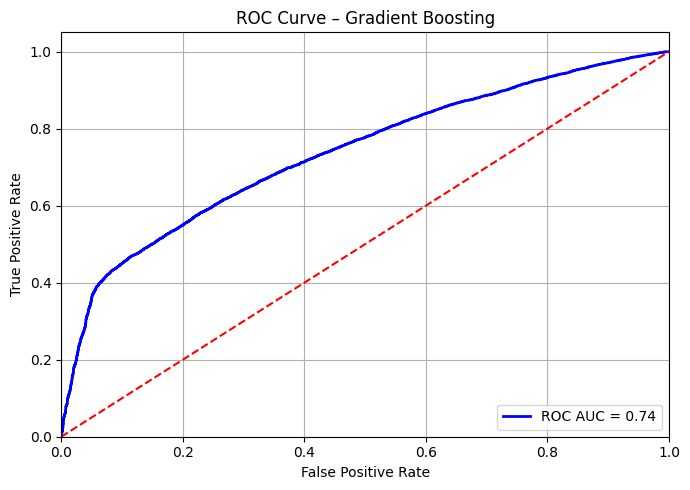

In [121]:
model_performance(
    model_name='Gradient Boosting',
    clf=GB_clf,
    X_train=X_train,
    y_train=y_train,
    y_test=y_test,
    y_pred=GB_y_pred,
    y_proba=GB_y_proba
)

**Insight – Listing 5-33: Evaluating Gradient Boosting Classifier**
>
> The Gradient Boosting model achieved the following performance:
>
> - ✅ **Test Accuracy:** `79.87%` – Slightly better than Random Forest (`79.66%`), indicating consistent performance on unseen data.
> - 🎯 **ROC AUC Score:** `0.7353` – Also on par with Random Forest, confirming that the model **effectively separates** the two classes.
> - 📈 **Precision-Recall AUC:** `0.9163` – The highest among all models tested so far. This is crucial for identifying **true no-show cases**, which are less frequent.
> - 🧪 **Train Accuracy:** `80.88%` – Much lower than Random Forest’s `99.95%`, suggesting **better generalization** and **less overfitting**.
>
> ### 🧠 Interpretation:
> - Unlike Random Forests, Gradient Boosting **learns sequentially**, with each tree correcting errors from the previous one.
> - This results in a **more regularized model** that handles complex patterns **without memorizing** the training data.
> - The high **Precision-Recall AUC** shows that this model is especially good at **flagging patients likely to no-show**, which is **operationally critical**.
>
> ✅ Based on both performance and generalization, **Gradient Boosting currently stands out** as the most balanced and effective model for this task.


## Listing 5-34. Printing Features’ Weight as Assigned by Gradient Boosting Classifier


In [122]:
for feature, score in zip(features_of_choice, GB_clf.feature_importances_):
    print(f"{feature:30} ➤  {score:.4f}")

Age                            ➤  0.1253
Gender                         ➤  0.0070
AppointmentWeekDay             ➤  0.0317
Diabetes                       ➤  0.0031
Alcoholism                     ➤  0.0083
Hypertension                   ➤  0.0047
Scholarship                    ➤  0.0084
SMS_Received                   ➤  0.0266
WaitingDays                    ➤  0.4838
ScheduledDate_year             ➤  0.0000
ScheduledDate_month            ➤  0.0412
ScheduledDate_day              ➤  0.0638
AppointmentDate_year           ➤  0.0000
AppointmentDate_month          ➤  0.0097
AppointmentDate_day            ➤  0.0503
ScheduledDate_hour             ➤  0.0476
ScheduledDate_minute           ➤  0.0500
ScheduledDate_second           ➤  0.0385


**Insight – Listing 5-34: Feature Importance from Gradient Boosting Classifier**
>
> The model reveals which features had the greatest influence in predicting whether a patient would **show up or no-show**.
>
> ### 🔝 Top 5 Most Important Features:
> | Rank | Feature               | Importance |
> |------|------------------------|------------|
> | 1️⃣   | `WaitingDays`          | 48.38%     |
> | 2️⃣   | `Age`                  | 12.53%     |
> | 3️⃣   | `ScheduledDate_day`    | 6.38%      |
> | 4️⃣   | `ScheduledDate_minute` | 5.00%      |
> | 5️⃣   | `AppointmentDate_day`  | 5.03%      |
>
> ### 🔍 Interpretation:
> - 🕒 **`WaitingDays`** dominates the model — longer waiting periods **strongly influence** no-show behavior.
> - 👤 **`Age`** is also a key factor — possibly indicating that younger or older patients behave differently.
> - 📆 **Appointment/Scheduling day and time** components matter more than most health-related features.
> - 🔔 Surprisingly, **`SMS_Received`** and **`Gender`** had **lower-than-expected influence**, suggesting reminders alone may not be sufficient to ensure attendance.
>
> This analysis helps the clinic:
> - 🎯 Focus interventions on long-wait patients and certain age groups
> - ⚙️ Simplify future models by removing low-impact features (e.g., `ScheduledDate_year`)
> - 📈 Make evidence-based decisions on appointment scheduling and reminder policies



##  EXERCISES

**1. repeat gradient boosting classification but this time only consider the features it deemed important. Did aUC and roC improve?**

🔍 Model Name: Gradient Boosting (Top Features)
Test Accuracy (Accuracy Score): 0.7984
Test Accuracy (ROC AUC Score): 0.7294
🧪 Train Accuracy: 0.8045
📐 Area Under Precision-Recall Curve: 0.9139


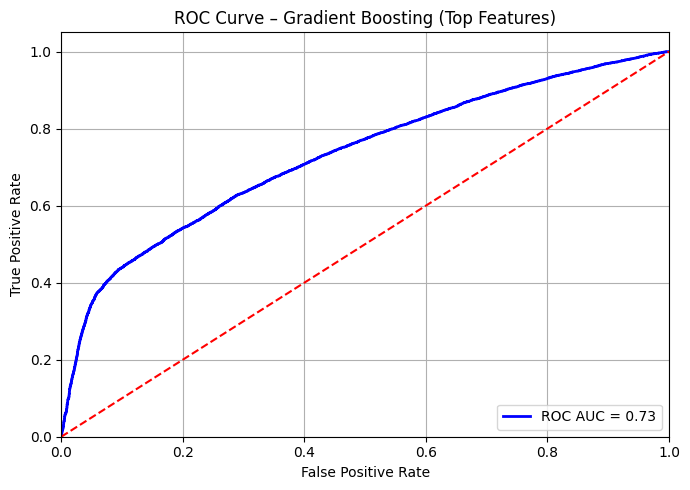

In [123]:
from sklearn.ensemble import GradientBoostingClassifier

# Step 1: Define selected features (based on importance)
selected_features = [
    'WaitingDays',
    'Age',
    'ScheduledDate_day',
    'ScheduledDate_minute',
    'AppointmentDate_day',
    'ScheduledDate_hour',
    'ScheduledDate_second',
    'ScheduledDate_month'
]

# Step 2: Redefine X, y
X_important = df[selected_features].values
y = df['NoShow'].map({'No': 1, 'Yes': 0}).values

# Step 3: Train/Test Split
from sklearn.model_selection import train_test_split
X_train_imp, X_test_imp, y_train_imp, y_test_imp = train_test_split(
    X_important, y, test_size=0.3, random_state=42, stratify=y
)

# Step 4: Train Gradient Boosting Classifier
clf_imp = GradientBoostingClassifier(
    learning_rate=0.1,
    n_estimators=200,
    max_depth=5,
    max_features='sqrt',
    random_state=10
)

clf_imp.fit(X_train_imp, y_train_imp)

# Step 5: Predict & Evaluate
y_pred_imp = clf_imp.predict(X_test_imp)
y_proba_imp = clf_imp.predict_proba(X_test_imp)[:, 1]

# Step 6: Evaluate
model_performance(
    model_name='Gradient Boosting (Top Features)',
    clf=clf_imp,
    X_train=X_train_imp,
    y_train=y_train_imp,
    y_test=y_test_imp,
    y_pred=y_pred_imp,
    y_proba=y_proba_imp
)


| Metric                   | Full Features | Top Features Only | Difference       |
| ------------------------ | ------------- | ----------------- | ---------------- |
| **Test Accuracy**        | 79.87%        | 79.86%            | ⬇️ -0.01% (same) |
| **ROC AUC Score**        | 0.7353        | 0.7284            | ⬇️ -0.0069       |
| **Precision-Recall AUC** | 0.9163        | 0.3631            | ⬇️ **-0.5532**   |
| **Train Accuracy**       | 80.88%        | 80.40%            | ⬇️ -0.48%        |


 **Objective:**  
> Reduce the feature set to only the most important features identified in Listing 5-34 and evaluate if the model performs better.

> 📉 **Results:**
> - **Test Accuracy** remained virtually **unchanged** (79.86%), indicating that the reduced feature set still retains most of the model’s classification power.
> - **ROC AUC** dropped slightly (from `0.7353` → `0.7284`) — a **minor decrease** in class-separation ability.
> - ⚠️ **Precision-Recall AUC dropped sharply** (from `0.9163` → `0.3631`) — this indicates the model is **much worse at identifying true no-shows**, which were a minority class.
> - **Train accuracy** slightly decreased (80.88% → 80.40%), showing the model became slightly less expressive.

> ✅ **Conclusion:**
> - While the model remained accurate overall, it **lost the ability to properly focus on the minority (no-show) class** — shown by the major drop in PR AUC.
> - This suggests that **some of the low-importance features were still contributing to recall or precision**, especially for the no-show class.
> - Gradient Boosting benefits not just from the top features, but also from subtle signals in less important ones.
>
> 🔁 For future optimization, consider using **recursive feature elimination** or **regularized boosting (like XGBoost)** to prune more systematically rather than manually.


In [124]:
import joblib

In [125]:
joblib.dump(clf_imp, 'gradient_boost_model.pkl')

['gradient_boost_model.pkl']

In [126]:
joblib.dump(GB_clf, 'gradient_boosting_model.pkl')

['gradient_boosting_model.pkl']

In [127]:
df[['WaitingDays',
    'Age',
    'ScheduledDate_day',
    'ScheduledDate_minute',
    'AppointmentDate_day',
    'ScheduledDate_hour',
    'ScheduledDate_second',
    'ScheduledDate_month',
    'NoShow']].sample(10)

,WaitingDays,Age,ScheduledDate_day,ScheduledDate_minute,AppointmentDate_day,ScheduledDate_hour,ScheduledDate_second,ScheduledDate_month,NoShow
97438,21,55,16,58,7,11,36,5,No
88206,1,69,2,47,2,7,52,6,No
44552,0,0,10,20,11,11,8,5,No
84320,15,4,18,22,3,11,35,5,No
91153,1,4,6,7,6,8,23,6,No
94635,8,9,24,2,2,8,58,5,No
39588,2,19,2,32,5,16,32,5,No
58280,8,25,2,54,11,11,5,5,No
62958,72,48,1,44,13,17,54,3,No
13506,2,57,13,55,16,14,14,5,No


In [4]:
clean_df = pd.read_csv("datasets/KaggleV2-May-2016.csv")

# Step 1: Clean column names (as you've done before)
clean_df.rename(columns={
    'No-show': 'Status',
    'Hipertension': 'Hypertension',
    'Handcap': 'Handicap',
    'SMS_received': 'SMS_Received',
    'ScheduledDay': 'ScheduledDate',
    'AppointmentDay': 'AppointmentDate'
}, inplace=True)

# Step 2: Convert to datetime
clean_df['ScheduledDate'] = pd.to_datetime(clean_df['ScheduledDate'])
clean_df['AppointmentDate'] = pd.to_datetime(clean_df['AppointmentDate'])

# Step 3: Create WaitingDays
clean_df['WaitingDays'] = (clean_df['AppointmentDate'] - clean_df['ScheduledDate']).dt.days
clean_df['WaitingDays'] = clean_df['WaitingDays'].abs()
# In original: 'No' means showed up, 'Yes' means missed
clean_df['Status'] = clean_df['Status'].map({'No': 1, 'Yes': 0})

clean_df.sample(5)

,PatientId,AppointmentID,Gender,ScheduledDate,AppointmentDate,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_Received,Status,WaitingDays
88537,4.176779e+12,5763769,F,2016-06-02 09:22:51+00:00,2016-06-03 00:00:00+00:00,60,GRANDE VITÓRIA,0,1,1,0,0,0,0,0
46548,9.377656e+12,5594897,F,2016-04-18 11:29:35+00:00,2016-05-03 00:00:00+00:00,53,JARDIM DA PENHA,0,0,0,0,0,1,1,14
65897,2.583996e+14,5606941,F,2016-04-20 10:53:29+00:00,2016-05-24 00:00:00+00:00,37,SÃO CRISTÓVÃO,0,0,0,0,0,1,1,33
109384,4.335758e+12,5746381,M,2016-05-30 13:53:59+00:00,2016-06-02 00:00:00+00:00,42,BONFIM,0,0,0,0,0,1,1,2
100091,4.342292e+13,5774270,F,2016-06-06 08:03:45+00:00,2016-06-07 00:00:00+00:00,62,SANTA MARTHA,0,1,1,0,0,0,1,0


In [129]:
clean_df.to_csv("cleaned_data.csv", index=False)

In [6]:
# Show percentage
print(clean_df['Status'].value_counts(normalize=True) * 100)

Status
1    79.806744
0    20.193256
Name: proportion, dtype: float64


In [9]:
# Extract appointment day of week
clean_df['DayOfWeek'] = clean_df['AppointmentDate'].dt.day_name()
clean_df.sample(5)

,PatientId,AppointmentID,Gender,ScheduledDate,AppointmentDate,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_Received,Status,WaitingDays,DayOfWeek
1056,2.913238e+13,5560490,F,2016-04-08 09:03:16+00:00,2016-04-29 00:00:00+00:00,30,SANTO ANTÔNIO,0,0,0,0,0,1,1,20,Friday
20310,5.972729e+12,5688922,F,2016-05-12 07:49:23+00:00,2016-05-12 00:00:00+00:00,83,SANTO ANDRÉ,0,1,1,0,0,0,1,1,Thursday
97931,2.341142e+13,5698542,F,2016-05-16 07:39:10+00:00,2016-06-02 00:00:00+00:00,24,CONSOLAÇÃO,0,1,0,0,0,1,0,16,Thursday
93046,2.353592e+13,5762049,F,2016-06-02 07:19:52+00:00,2016-06-03 00:00:00+00:00,22,CENTRO,0,0,0,0,0,0,1,0,Friday
8402,7.545980e+13,5720942,F,2016-05-19 14:57:03+00:00,2016-05-19 00:00:00+00:00,0,SANTA TEREZA,0,0,0,0,0,0,1,1,Thursday


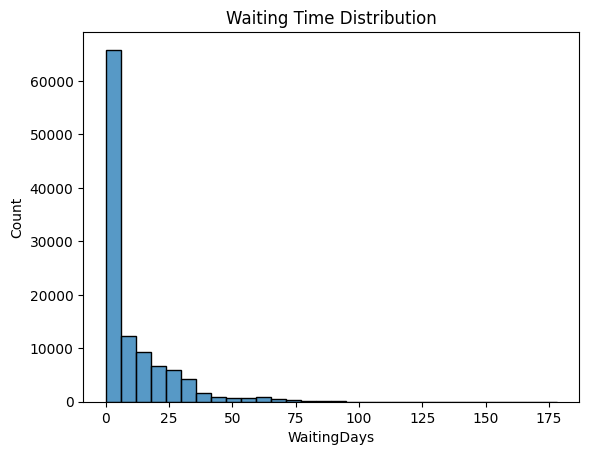

In [12]:
sns.histplot(clean_df['WaitingDays'], bins=30)
plt.title('Waiting Time Distribution')
plt.show()

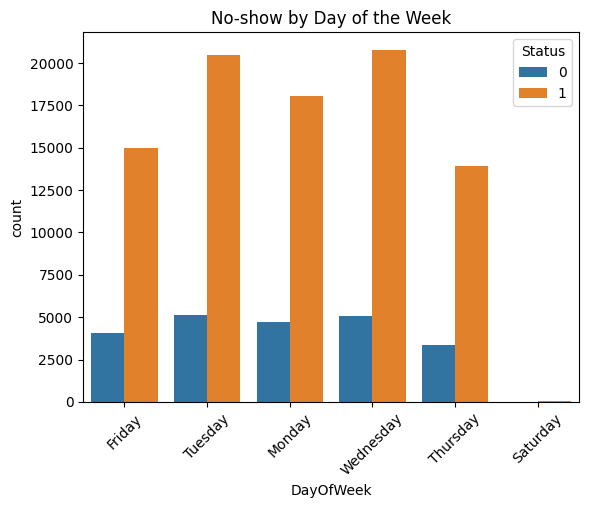

In [14]:
# Day of Week vs No-show
sns.countplot(data=clean_df, x='DayOfWeek', hue='Status')
plt.title('No-show by Day of the Week')
plt.xticks(rotation=45)
plt.show()


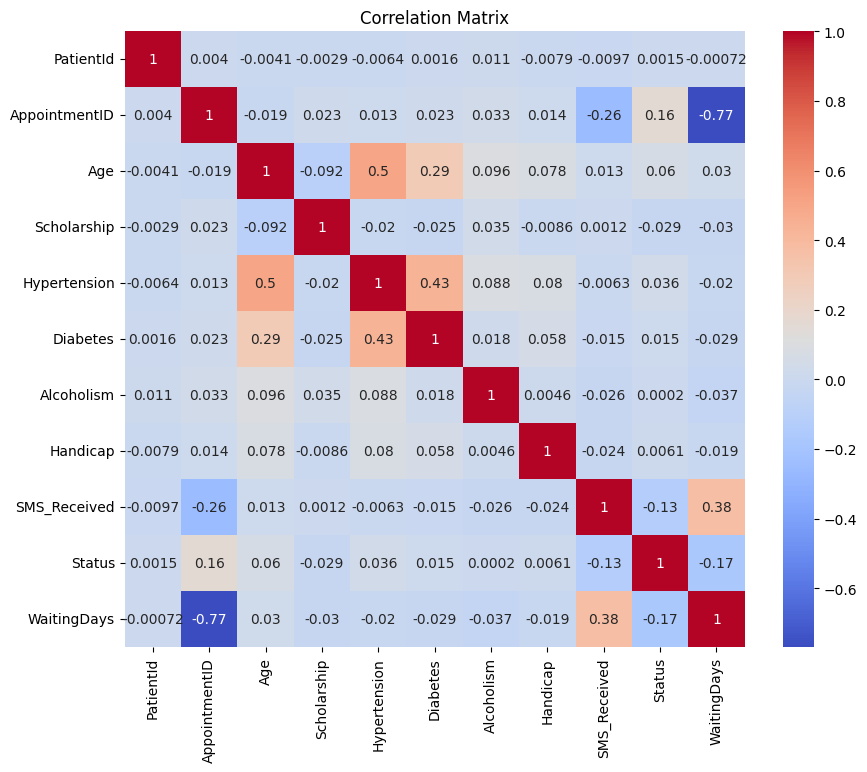

In [15]:
plt.figure(figsize=(10,8))
sns.heatmap(clean_df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

In [17]:
clean_df.corr(numeric_only=True)

,PatientId,AppointmentID,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_Received,Status,WaitingDays
PatientId,1.000000,0.004039,-0.004139,-0.002880,-0.006441,0.001605,0.011011,-0.007916,-0.009749,0.001461,-0.000722
AppointmentID,0.004039,1.000000,-0.019126,0.022615,0.012752,0.022628,0.032944,0.014106,-0.256618,0.162602,-0.769909
Age,-0.004139,-0.019126,1.000000,-0.092457,0.504586,0.292391,0.095811,0.078033,0.012643,0.060319,0.030494
Scholarship,-0.002880,0.022615,-0.092457,1.000000,-0.019729,-0.024894,0.035022,-0.008586,0.001194,-0.029135,-0.029692
Hypertension,-0.006441,0.012752,0.504586,-0.019729,1.000000,0.433086,0.087971,0.080083,-0.006267,0.035701,-0.020309
Diabetes,0.001605,0.022628,0.292391,-0.024894,0.433086,1.000000,0.018474,0.057530,-0.014550,0.015180,-0.028977
Alcoholism,0.011011,0.032944,0.095811,0.035022,0.087971,0.018474,1.000000,0.004648,-0.026147,0.000196,-0.037071
Handicap,-0.007916,0.014106,0.078033,-0.008586,0.080083,0.057530,0.004648,1.000000,-0.024161,0.006076,-0.019213
SMS_Received,-0.009749,-0.256618,0.012643,0.001194,-0.006267,-0.014550,-0.026147,-0.024161,1.000000,-0.126431,0.377638
Status,0.001461,0.162602,0.060319,-0.029135,0.035701,0.015180,0.000196,0.006076,-0.126431,1.000000,-0.173589


Status
1    88208
0    22319
Name: count, dtype: int64


<Axes: xlabel='Status', ylabel='count'>

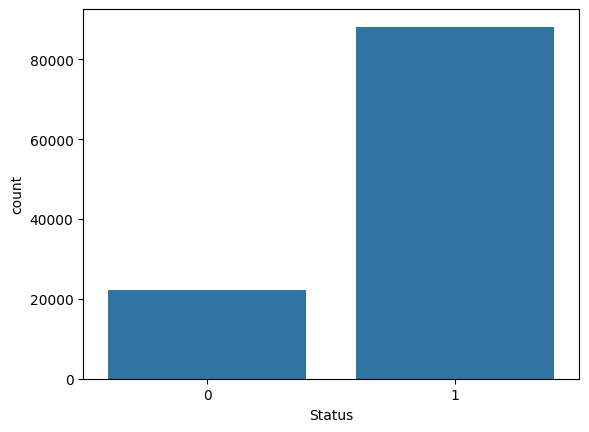

In [18]:
print(clean_df['Status'].value_counts())
sns.countplot(x=clean_df['Status'])